# Clustering of VGG features

In [11]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle


from find_maxima import find_maxima
import tifffile
import glob

from PIL import Image
import sys
sys.path.append('../src')
from convert_ROI_to_cell_volumes import *

from scipy import ndimage
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.manifold import TSNE

         
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [172]:
path = '/Users/dominicwaithe/Desktop/cell_images/'
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)


In [3]:
# load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)


(224, 224, 3)


In [173]:

num_of_cells = 4000
flowers_sub = flowers[0:num_of_cells]

   

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   
data = {}
p = '/Users/dominicwaithe/Desktop/cell_images/'

# lop through each image in the dataset
for flower in flowers_sub:
    # try to extract the features and update the dictionary
    #try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    #except:
    #    with open(p,'wb') as file:
    #        pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('flower_labels.csv')
#label = df['label'].tolist()


# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=10, random_state=22)
pca.fit(feat)


#_TSNE = TSNE(n_components=2)
#x = _TSNE.fit_transform(feat)

x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=4,n_jobs=-1, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        

        

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

Clipping cluster size from 72 to 30


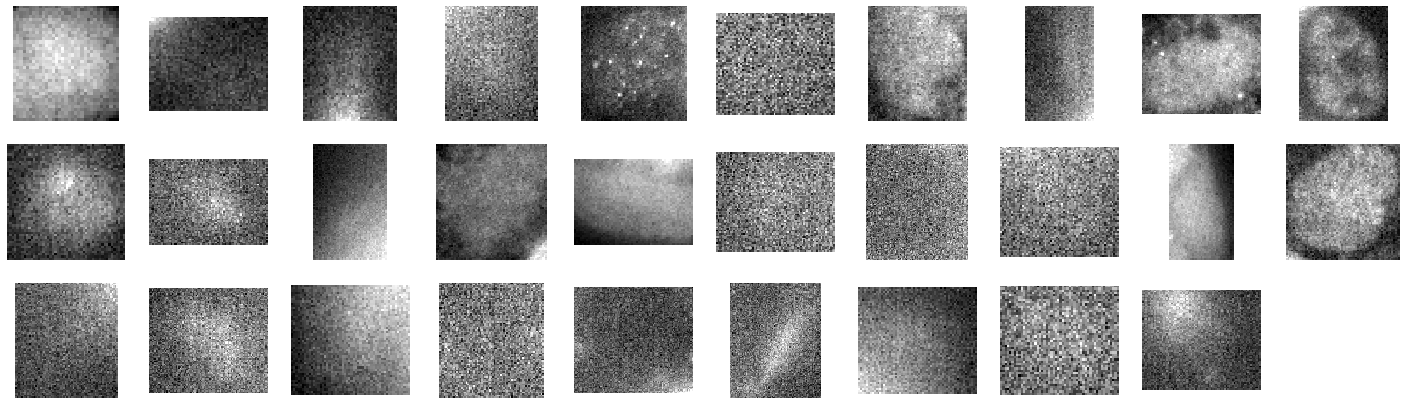

In [268]:
view_cluster(0)

Clipping cluster size from 225 to 30


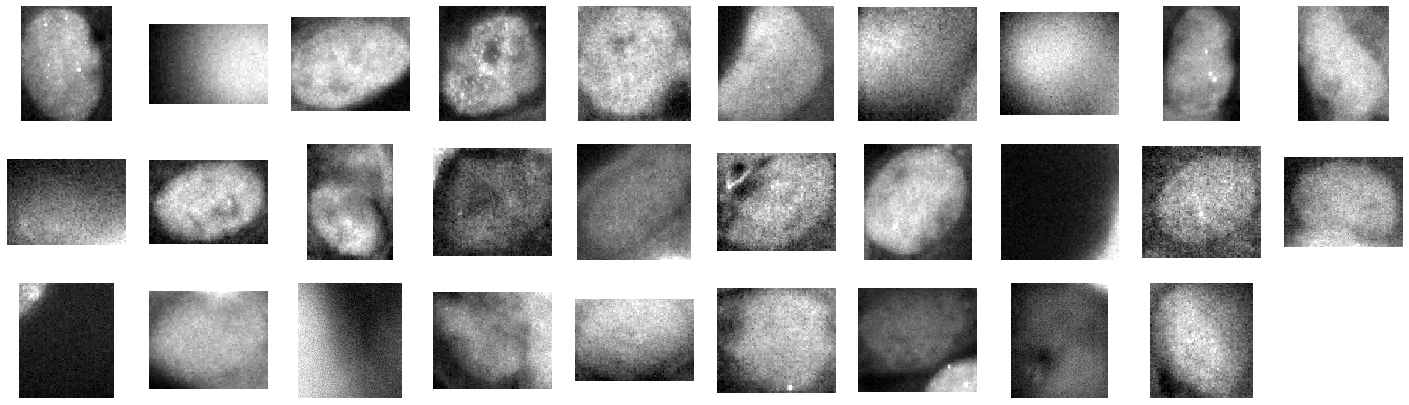

In [269]:
view_cluster(1)

Clipping cluster size from 194 to 30


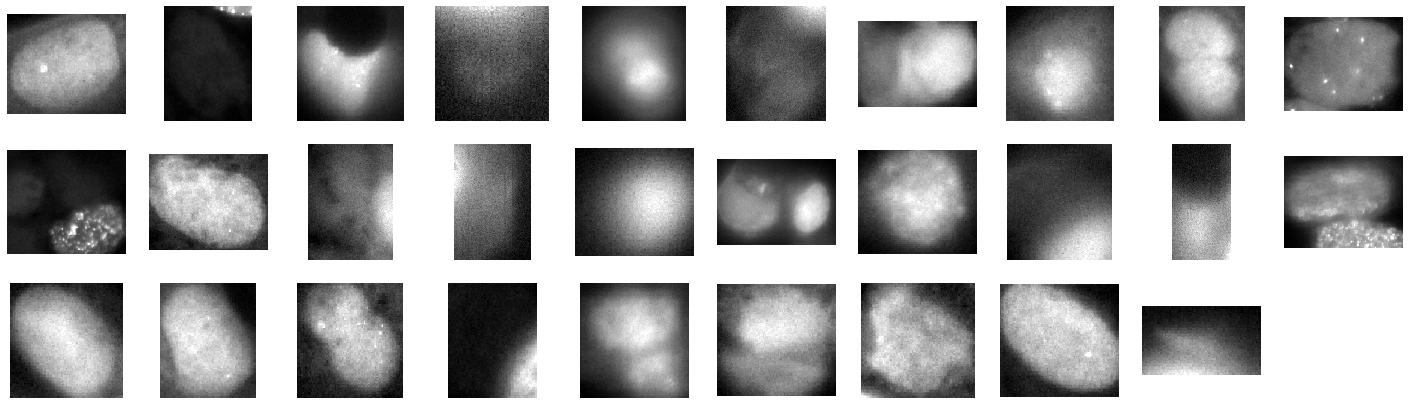

In [270]:
view_cluster(2)

Clipping cluster size from 191 to 30


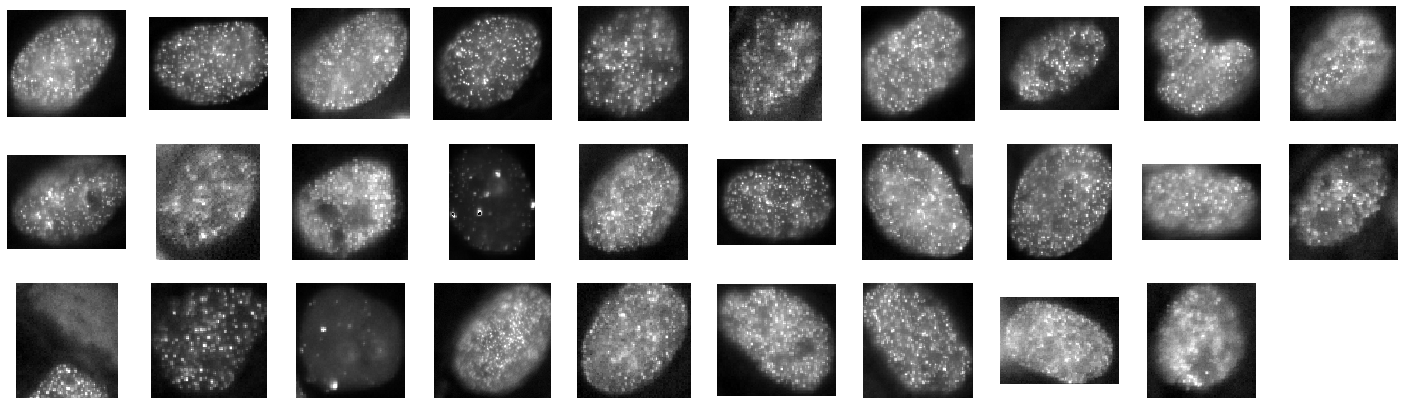

In [271]:
view_cluster(3)

(682, 10)


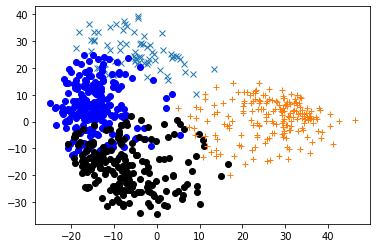

In [179]:
print(x.shape)
labels = kmeans.labels_
bint = labels==0
plt.plot(x[bint,0],x[bint,1],'x')
bint = labels==1
plt.plot(x[bint,0],x[bint,1],'bo')
bint = labels==2
plt.plot(x[bint,0],x[bint,1],'ko')
bint = labels==3
plt.plot(x[bint,0],x[bint,1],'+')
#bint = labels==4
#plt.plot(x[bint,0],x[bint,1],'go')

In [173]:
ntol =30
def find_local_maxima_np(img_data):
    #This is the numpy/scipy version of the above function (find local maxima).
    #Its a bit faster, and more compact code.
    
    #Filter data with maximum filter to find maximum filter response in each neighbourhood
    max_out = ndimage.filters.maximum_filter(img_data,size=3)
    #Find local maxima.
    local_max = np.zeros((img_data.shape))
    local_max[max_out == img_data] = 1
    local_max[img_data == np.min(img_data)] = 0
    return local_max.astype(np.bool)

group_count = []
for i in range(0,5):
    count = []
    for cell in range(groups[i].__len__()):
        file = groups[i][cell]
        img = load_img(file)
        img_data = np.array(img).astype(np.float64)[:,:,0]
        #img_data = ndimage.gaussian_filter(img_data,4)
        #Finds the local maxima using maximum filter.
        local_max = find_local_maxima_np(img_data)
        y1,x1,out = find_maxima(img_data,local_max.astype(np.uint8),ntol)
        count.append(y1.__len__())
        
    group_count.append(np.average(count))
print(group_count)  

[46.794117647058826, 27.648809523809526, 25.708333333333332, 92.40671641791045, 144.44554455445544]


(1000, 2)

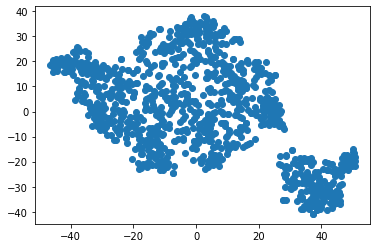

In [174]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 100:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:99]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

### TSNE and Kmeans prediction of images.

In [2]:

outpaths = []
#outpaths.append("/Users/dominicwaithe/Desktop/out02/")
#outpaths.append("/Users/dominicwaithe/Desktop/out03/")
#outpaths.append("/Users/dominicwaithe/Desktop/out04/")
#outpaths.append("/Users/dominicwaithe/Desktop/out05/")
#outpaths.append("/Users/dominicwaithe/Desktop/out06/")
#outpaths.append("/Users/dominicwaithe/Desktop/out07/")
#outpaths.append("/Users/dominicwaithe/Desktop/out08/")
#outpaths.append("/Users/dominicwaithe/Desktop/out09/")
#outpaths.append("/Users/dominicwaithe/Desktop/out10/")
#outpaths.append("/Users/dominicwaithe/Desktop/out11/")
#outpaths.append("/Users/dominicwaithe/Desktop/out12/")
#outpaths.append("/Users/dominicwaithe/Desktop/out13/")
#outpaths.append("/Users/dominicwaithe/Desktop/out14/")
#outpaths.append("/Users/dominicwaithe/Desktop/out15/")
#outpaths.append("/Users/dominicwaithe/Desktop/out16/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel05out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel06out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel07out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel08out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel09out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel10out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel11out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel12out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel13out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel14out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel15out/")
outpaths.append("/Users/dominicwaithe/Desktop/relabel16out/")

In [12]:

img_path = '/Users/dominicwaithe/Desktop/temp/'
pca = pickle.load(open( "/Users/dominicwaithe/Desktop/cell_images/pca.pickle", "rb" ))
kmeans = pickle.load(open( "/Users/dominicwaithe/Desktop/cell_images/kmeans.pickle", "rb" ))
channel = 1
cell_data = []

imgnum = 0
xs = []
#flowers_sub.sort()
for path in outpaths:
    data = collect_info(path,channel,'raw')
    store_cell_feats = []
    for cell in range(0,data.__len__()):
        
        img_vol = data[cell]
        cell_shape = img_vol.__len__()
        raw_img = img_vol[cell_shape//2]
        nimg = normalise_for_8bit(raw_img)
        io.imsave(img_path+"/temp.png", nimg)  
        
        img = load_img(img_path+"/temp.png", target_size=(224,224))
        img = np.array(img)
        
        #pimg = Image.fromarray(nimg)
        #rimg = pimg.resize((224, 224))
        #img = np.array(rimg)

        #nimg = normalise_for_8bit(raw_img).astype(np.uint8)
        #pimg = Image.fromarray(nimg)
        #rimg = pimg.resize((224, 224))
        #rgb = np.zeros((224,224,3))
        #rgb[:,:,0] = np.array(img)
        #rgb[:,:,1] = np.array(img)
        #rgb[:,:,2] = np.array(img)
        reshaped_img = img.reshape(1,224,224,3) 
        # prepare image for model
        imgx = preprocess_input(reshaped_img)
        # get the feature vector
        features = model.predict(imgx, use_multiprocessing=True)
        store_cell_feats.append(features)

    feat = np.array(list(store_cell_feats))
    feat = feat.reshape(-1,4096)
    x = pca.transform(feat)
    xs.append(x)
    cell_data.append(kmeans.predict(x))
copy_to_clipboard(cell_data)

no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays present in file.
no Overlays pr

In [300]:
import pickle
pickle.dump(pca,open( "pca.pickle", "wb" ))
pickle.dump(kmeans,open( "kmeans.pickle", "wb" ))

In [29]:

def copy_to_clipboard(cell_data):
    stg = ""
    maxt = 0
    for num in range(0,cell_data.__len__()):
        if cell_data[num].__len__() > maxt:
            maxt = cell_data[num].__len__()
    for idx in range(0,maxt):
        for num in range(0,cell_data.__len__()):
            if idx < cell_data[num].__len__():
                stg += str(cell_data[num][idx]) 
            stg+="\t"
        stg+='\n'
    pyperclip.copy(stg)
    spam = pyperclip.paste()

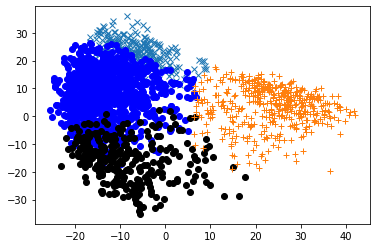

In [288]:
x = xs[0]
labels = cell_data[0]
bint = labels==0
plt.plot(x[bint,0],x[bint,1],'x')
bint = labels==1
plt.plot(x[bint,0],x[bint,1],'bo')
bint = labels==2
plt.plot(x[bint,0],x[bint,1],'ko')
bint = labels==3
plt.plot(x[bint,0],x[bint,1],'+')

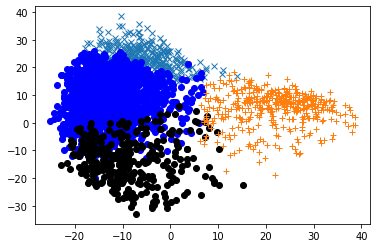

In [279]:
x = xs[3]
labels = cell_data[3]
bint = labels==0
plt.plot(x[bint,0],x[bint,1],'x')
bint = labels==1
plt.plot(x[bint,0],x[bint,1],'bo')
bint = labels==2
plt.plot(x[bint,0],x[bint,1],'ko')
bint = labels==3
plt.plot(x[bint,0],x[bint,1],'+')

In [9]:
import skimage.io as io

In [163]:
img_vol = data[0]
cell_shape = img_vol.__len__()
raw_img = img_vol[cell_shape//2]
nimg = normalise_for_8bit(raw_img)
pimg = Image.fromarray(nimg)
rimg = pimg.resize((224, 224))
rgb = np.zeros((224,224,3))
rgb[:,:,0] = np.array(rimg) 
rgb[:,:,1] = np.array(rimg)
rgb[:,:,2] = np.array(rimg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


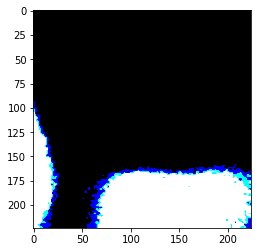

In [234]:
plt.imshow(rgb[:,:,:])

In [232]:
p

dtype('uint8')

0 255
0 151.061


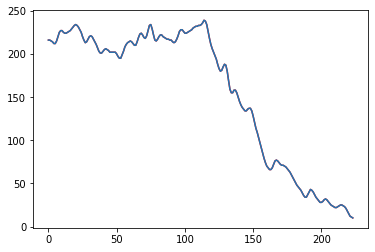

In [257]:
pimg = Image.fromarray(nimg)
rimg = pimg.resize((224, 224))
rimg = np.array(rimg)
plt.plot(rimg[50,:],'r-')
print(np.min(rimg), np.max(rimg))
plt.plot(img[50,:])
print(np.min(nimg), np.max(rgb))


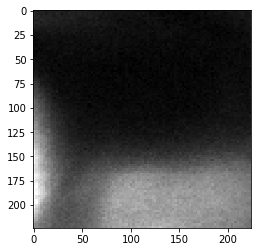

In [222]:
plt.imshow(img)

TypeError: Image data of dtype object cannot be converted to float

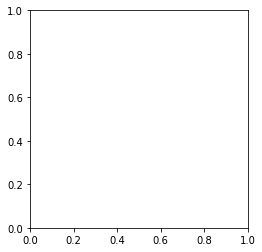

In [289]:
plt.imshow(nimg)

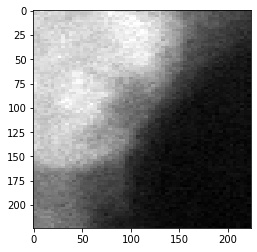

In [261]:
plt.imshow(img)

In [262]:
img.dtype

dtype('uint8')